In [1]:
import pandas
from ztfimg import science
import numpy as np

# 1. Single Image Aperture Photometry

In [2]:

filename = "/sps/ztf/data/sci/2018/0221/304792/ztf_20180221304792_700353_zg_c01_o_q1_sciimg.fits"


In [3]:
from ztfimg import science

In [4]:
sci = science.ScienceQuadrant.from_filename(filename, use_dask=False)

<AxesSubplot:>

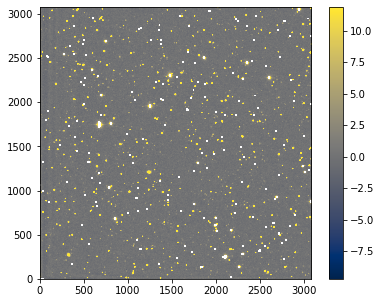

In [5]:
sci.show( dataprop={"which":"dataclean"} )

## 1.1 sci.get_aperture()

### Basic, you input the `x` and `y` positions
If you already the x,y positions for which you want the aperture, and say you want a radius of 5.5pixels

In [6]:
x,y = np.random.uniform(30,3000, size=(300,2)).T
flux, error, flag = sci.get_aperture(x,y, radius=5.5)

### With background "ring"

In [7]:
x,y = np.random.uniform(30,3000, size=(300,2)).T
flux, error, flag = sci.get_aperture(x,y, radius=5.5, 
                                    bkgann=[5.5,7])

### Providing multiple sizes at once
(careful with the numpy Broadcasting rules for radius)

In [8]:
x,y = np.random.uniform(30,3000, size=(300,2)).T
flux, error, flag = sci.get_aperture(x,y, 
                                     radius=np.linspace(2,8,10)[:,None])

In [9]:
np.shape(flux)

(10, 300)

### The asdataframe option
to ease future use, the asdataframe option could be use to convert output arrays in DataFrame. This is quite useful with multiple radius are given

- f_i flux of the i-th radius
- f_i_e associated error
- f_i_f associated flag

In [10]:
x,y = np.random.uniform(30,3000, size=(300,2)).T
dataout = sci.get_aperture(x,y, radius=np.linspace(2,8,10)[:,None], asdataframe=True)
dataout

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_0_f,f_1_f,f_2_f,f_3_f,f_4_f,f_5_f,f_6_f,f_7_f,f_8_f,f_9_f
0,1.236183,-9.216144,-16.655138,2.438128,3.170324,-11.688996,-2.181959,-10.938552,-18.252952,-45.702642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.683472,10.411651,21.848418,44.721151,51.498625,40.336580,69.327464,104.174125,83.269487,23.215165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-16.686436,-26.171262,-16.362573,-5.897571,-20.339175,-29.350683,-39.310265,-49.234723,-72.007835,-98.596686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4.854149,2.964311,9.752978,16.826205,15.174229,24.363957,33.537936,16.581408,5.879217,15.690504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.925871,13.722191,30.152147,29.741650,29.334661,20.029867,9.109688,3.988474,23.602491,30.822435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-20.856907,-11.313744,-0.608259,1.815200,-3.970841,22.973388,55.806919,65.115698,43.418936,42.952944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,12.373794,14.895159,24.901826,53.198145,59.604725,32.342792,32.208594,36.898478,10.986826,5.363401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,17.463924,32.949842,38.645296,53.352798,69.177291,97.467858,113.504717,133.169887,162.043360,206.334226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Providing `RA`, `Dec` in place on `x` and `y`.
Nothing simpler, just use the `system="radec"` option. Remark that this only affects the input centroid, the radius remains in pixels

In [11]:
# Let's create fake radec
x,y = np.random.uniform(30,3000, size=(300,2)).T
ra,dec = sci.xy_to_radec(x,y)

In [12]:
sci.get_aperture(ra,dec, radius=np.asarray([3, 5])[:,None], system="radec", asdataframe=True)

,f_0,f_1,f_0_e,f_1_e,f_0_f,f_1_f
0,-20.849244,7.723542,23.346345,38.910576,0.0,0.0
1,6.040091,-16.100365,23.346345,38.910576,0.0,0.0
2,-11.481402,-9.097541,23.346345,38.910576,0.0,0.0
3,24.964828,-5.492969,23.346345,38.910576,0.0,0.0
4,19.660408,44.289341,23.346345,38.910576,0.0,0.0
...,...,...,...,...,...,...
295,-3.983727,3.593961,23.346345,38.910576,0.0,0.0
296,54.498625,50.530449,23.346345,38.910576,0.0,0.0
297,24.052580,57.276438,23.346345,38.910576,0.0,0.0
298,31.417895,11.280564,23.346345,38.910576,0.0,0.0


## 1.2 sci.getcat_aperture()

Sometime it could be more convenient to input a catalog (DataFrame) in place of positions. `getcat_aperture()` does that for you. 
   1. It parses the catalog, 
   2. runs get_apetures()
   3. join the result to a copy of the input catalog and returns if (if you want, see `join=True`)

In [13]:
catalog = sci.get_catalog(calibrators="gaia", extra=[], isolation=20)

Let's just use the isolated stars from the catalog

In [14]:
isolatedgaia = catalog[catalog["isolated"]][["ra","dec", "x","y", "gmag", "e_gmag"]]
isolatedgaia

,ra,dec,x,y,gmag,e_gmag
914,150.433524,44.281304,1643.947933,3038.231350,16.846422,0.002819
967,150.373882,44.282391,1795.746396,3042.899397,20.651617,0.009252
971,150.359310,44.297603,1835.778304,2990.962768,19.573116,0.004265
972,150.380185,44.305993,1784.395836,2958.219476,20.442200,0.007465
973,150.369243,44.318446,1814.648651,2915.567866,20.850407,0.022244
...,...,...,...,...,...,...
8527,150.169635,45.142879,2477.348034,15.847422,17.696718,0.002972
8528,150.117507,45.135536,2606.520455,48.871041,16.648909,0.002820
8565,149.961892,45.142500,2997.532811,44.338875,21.510262,0.026620
8566,149.947381,45.137984,3033.061766,62.225499,21.354904,0.038582


In [15]:
# for a radius of 5, but could have used a array of radius.
outcat = sci.getcat_aperture(isolatedgaia, radius=np.atleast_1d(5), xykeys=["x","y"], system="xy")
outcat

,index,ra,dec,x,y,gmag,e_gmag,f_0,f_0_e,f_0_f
0,914,150.433524,44.281304,1643.947933,3038.231350,16.846422,0.002819,2783.513219,38.910576,0.0
1,967,150.373882,44.282391,1795.746396,3042.899397,20.651617,0.009252,146.402824,38.910576,0.0
2,971,150.359310,44.297603,1835.778304,2990.962768,19.573116,0.004265,54.965827,38.910576,0.0
3,972,150.380185,44.305993,1784.395836,2958.219476,20.442200,0.007465,206.994084,38.910576,0.0
4,973,150.369243,44.318446,1814.648651,2915.567866,20.850407,0.022244,85.063950,38.910576,0.0
...,...,...,...,...,...,...,...,...,...,...
1595,8527,150.169635,45.142879,2477.348034,15.847422,17.696718,0.002972,1947.032877,38.910576,0.0
1596,8528,150.117507,45.135536,2606.520455,48.871041,16.648909,0.002820,4858.358639,38.910576,0.0
1597,8565,149.961892,45.142500,2997.532811,44.338875,21.510262,0.026620,1423.038235,38.910576,0.0
1598,8566,149.947381,45.137984,3033.061766,62.225499,21.354904,0.038582,738.391939,38.910576,0.0


`xykeys=["x","y"], system="xy"` is by default. It is shown here so you know it exists. 
remark that, since this calls inside get_aperture, you have all the get_aperture options. For instance, if your catalog don't have x, y by simply ra, dec do: `xykeys=["ra","dec"], system="radec"`

***

# 2. Multiple Image Aperture Photometry

You can loop over multiple files, but we implemented a ImageCollection wrapper that simplifies things (especially if you are using dask)

In [3]:
datafile = pandas.read_hdf("/sps/ztf/data/storage/starflat/datafiles/starflat_20180221_zg_rcid0.h5")
files = datafile["filename"].values
files[:5]

array(['/sps/ztf/data/sci/2018/0221/328009/ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits',
       '/sps/ztf/data/sci/2018/0221/364016/ztf_20180221364016_700591_zg_c01_o_q1_sciimg.fits',
       '/sps/ztf/data/sci/2018/0221/342755/ztf_20180221342755_700539_zg_c01_o_q1_sciimg.fits',
       '/sps/ztf/data/sci/2018/0221/290949/ztf_20180221290949_700475_zg_c01_o_q1_sciimg.fits',
       '/sps/ztf/data/sci/2018/0221/327014/ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits'],
      dtype=object)

In [4]:
from ztfimg import aperture

### In this example we are only using 5 images with use_dask=False

In [5]:
apertures = aperture.AperturePhotometry.from_filenames(files[:5], use_dask=False)

The ImageCollection is stored in aperture.images

In [6]:
[l.split("/")[-1] for l in apertures.images.filenames]

['ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221364016_700591_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221342755_700539_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221290949_700475_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits']

## 2.1 get_aperture()

You can run the same tools as before `get_aperture()` but then x (and y) should be a list x (y)

In [7]:
x,y = np.random.uniform(30,3000, size=(300, 5, 2)).T

In [8]:
dfs = apertures.get_aperture(x, y, radius=np.atleast_1d(5)[:,None], asdataframe=True)

Let's concat them keeping track of the input filename

In [9]:
basename = [l.split("/")[-1] for l in apertures.images.filenames]
basename

['ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221364016_700591_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221342755_700539_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221290949_700475_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits']

In [10]:
# remark that is this stored in apertures.basenames

In [11]:
pandas.concat(dfs, keys=basename)

f_0      f_0_e  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0    60.646476  39.078469   
                                                  1    16.692758  39.078469   
                                                  2    14.725894  39.078469   
                                                  3   -34.288811  39.078469   
                                                  4    36.758384  39.078469   
...                                                          ...        ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 295 -31.432684  38.981536   
                                                  296 -11.752794  38.981536   
                                                  297  17.504928  38.981536   
                                                  298   3.850875  38.981536   
                                                  299 -15.248991  38.981536   

                                                       f_0_f  
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0      0.0  
                                                  1      0.0  
                                                  2      0.0  
                                                  3      0.0  
                                                  4      0.0  
...                                                      ...  
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 295    0.0  
                                                  296    0.0  
                                                  297    0.0  
                                                  298    0.0  
                                                  299    0.0  

[1500 rows x 3 columns]

# 2.2 getcat_aperture()

Same as for get_aperture, input one catalog per image. This can easily be obtained with ImageCollection.get_catalog()

In [12]:
cats = apertures.images.get_catalog(calibrators="gaia", extra=[], isolation=20)

In [13]:
cats

[                  Source                  ps1_id             sdssdr13_id  \
 495   808112974509292416  1.6091150456093523e+17  1.2376578737957112e+18   
 496   808113215027819776  1.6091150521149962e+17  1.2376578737957115e+18   
 497   808113459842368000  1.6094150522408093e+17   1.237657873795711e+18   
 498   808113494202106624  1.6095150497152723e+17   1.237657873795711e+18   
 499   808113696063797888   1.609015042390882e+17  1.2376578737957112e+18   
 ...                  ...                     ...                     ...   
 4378  809896077428411904  1.6193150097864646e+17  1.2376578748695183e+18   
 4379  809896176211546240  1.6193150072684982e+17  1.2376578748695186e+18   
 4382  809896421025794944  1.6193150128633894e+17  1.2376578748695186e+18   
 4387  809896966485529600   1.619415003420642e+17  1.2376578748695186e+18   
 5141  820405553164056960  1.6195149941998336e+17  1.2376578748694528e+18   
 
               ra        dec       gmag    e_gmag   gmagcorr      rpmag  \

In [14]:

apcat = apertures.getcat_aperture(cats, radius=5)
apcat

index  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0       495   
                                                  1       496   
                                                  2       497   
                                                  3       498   
                                                  4       499   
...                                                       ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 1325   4395   
                                                  1326   4404   
                                                  1327   4430   
                                                  1328   4431   
                                                  1329   4432   

                                                                    Source  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0     808112974509292416   
                                                  1     808113215027819776   
                                                  2     808113459842368000   
                                                  3     808113494202106624   
                                                  4     808113696063797888   
...                                                                    ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 1325  809893397369195264   
                                                  1326  809894011548027008   
                                                  1327  809895871270004864   
                                                  1328  809895970053113088   
                                                  1329  809895970053113216   

                                                                        ps1_id  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0     1.6091150456093523e+17   
                                                  1     1.6091150521149962e+17   
                                                  2     1.6094150522408093e+17   
                                                  3     1.6095150497152723e+17   
                                                  4      1.609015042390882e+17   
...                                                                        ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 1325  1.6192150137797053e+17   
                                                  1326   1.619215022609601e+17   
                                                  1327   1.618815006544086e+17   
                                                  1328  1.6191150065277373e+17   
                                                  1329  1.6191150066420698e+17   

                                                                   sdssdr13_id  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0     1.2376578737957112e+18   
                                                  1     1.2376578737957115e+18   
                                                  2      1.237657873795711e+18   
                                                  3      1.237657873795711e+18   
                                                  4     1.2376578737957112e+18   
...                                                                        ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 1325  1.2376578748695186e+18   
                                                  1326  1.2376578748695186e+18   
                                                  1327  1.2376578748695183e+18   
                                                  1328  1.2376578748695186e+18   
                                                  1329  1.2376578748695186e+18   

                                                                ra        dec  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0     150.456158  44.095444   
                                                  1     150.521238  44.099108   
                                                  2     150.522449  44.116853   
                                            

# 2.3 build_apcatalog()

For convenience, the get_catalog and getcat_aperture() have been combined into on simple method `build_apcatalog()`
It really only does:
   1. cats = self.images.get_catalog()
   2. return self.getcat_aperture(cats, radius)
   
But that's quite easy to use !

In [15]:
apcat = apertures.build_apcatalog(radius= np.linspace(1,5,3), 
                                  calibrators="gaia", extra=[], isolation=20)

In [16]:
apcat

index  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0       495   
                                                  1       496   
                                                  2       497   
                                                  3       498   
                                                  4       499   
...                                                       ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 1325   4395   
                                                  1326   4404   
                                                  1327   4430   
                                                  1328   4431   
                                                  1329   4432   

                                                                    Source  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0     808112974509292416   
                                                  1     808113215027819776   
                                                  2     808113459842368000   
                                                  3     808113494202106624   
                                                  4     808113696063797888   
...                                                                    ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 1325  809893397369195264   
                                                  1326  809894011548027008   
                                                  1327  809895871270004864   
                                                  1328  809895970053113088   
                                                  1329  809895970053113216   

                                                                        ps1_id  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0     1.6091150456093523e+17   
                                                  1     1.6091150521149962e+17   
                                                  2     1.6094150522408093e+17   
                                                  3     1.6095150497152723e+17   
                                                  4      1.609015042390882e+17   
...                                                                        ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 1325  1.6192150137797053e+17   
                                                  1326   1.619215022609601e+17   
                                                  1327   1.618815006544086e+17   
                                                  1328  1.6191150065277373e+17   
                                                  1329  1.6191150066420698e+17   

                                                                   sdssdr13_id  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0     1.2376578737957112e+18   
                                                  1     1.2376578737957115e+18   
                                                  2      1.237657873795711e+18   
                                                  3      1.237657873795711e+18   
                                                  4     1.2376578737957112e+18   
...                                                                        ...   
ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits 1325  1.2376578748695186e+18   
                                                  1326  1.2376578748695186e+18   
                                                  1327  1.2376578748695183e+18   
                                                  1328  1.2376578748695186e+18   
                                                  1329  1.2376578748695186e+18   

                                                                ra        dec  \
ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits 0     150.456158  44.095444   
                                                  1     150.521238  44.099108   
                                                  2     150.522449  44.116853   
                                            

## Using Dask

This happens when you load the `AperturePhotometry`

In [17]:
from dask.distributed import Client
client = Client()

In [18]:
apertures = aperture.AperturePhotometry.from_filenames(files[:50], use_dask=True)

In [19]:
apertures.basenames # This is known

['ztf_20180221328009_700426_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221364016_700591_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221342755_700539_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221290949_700475_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221327014_700424_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221266748_700389_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221337882_700465_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221299838_700330_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221282546_700431_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221273657_700361_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221318125_700396_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221355116_700534_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221310220_700341_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221346227_700486_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221324549_700413_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221319109_700398_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221277118_700415_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221291933_700473_zg_c01_o_q1_sciimg.fits',
 'ztf_20180221303808_700517_